# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|...|...|...|
|...|...|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


In [2]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id').sort_index()

## Data Overview

In [3]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,0
7,44.0,0,0,222.75,19.6,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
8,79.0,0,0,99.23,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,0
9,44.0,0,0,125.44,35.5,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,0
10,34.0,0,0,89.11,28.0,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
20,36.0,0,0,89.79,27.3,False,True,False,False,True,True,False,False,False,False,False,True,False,False,True,0
22,5.0,0,0,100.81,20.6,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,0
23,68.0,0,0,75.91,21.8,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,0
24,72.0,0,1,113.65,27.4,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,0


Test Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
4,37.0,0,0,82.15,24.3,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
12,56.0,0,0,102.30,54.9,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False
14,67.0,0,0,111.04,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
25,4.0,0,0,71.90,14.1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False
66,58.0,0,1,96.48,24.0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
71,7.0,0,0,94.41,16.8,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
72,3.0,0,0,93.74,17.7,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
91,42.0,0,0,98.53,18.5,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,35.0,0,0,85.59,28.0,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False


## Exploratory Data Analysis

In [4]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               

None

In [5]:
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype(int)

In [6]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int32  
 6   gender_Male                     33550 non-null  int32  
 7   gender_Other                    33550 non-null  int32  
 8   ever_married_No                 33550 non-null  int32  
 9   ever_married_Yes                33550 non-null  int32  
 10  work_type_Govt_job              33550 non-null  int32  
 11  work_type_Never_worked          33550 non-null  int32  
 12  work_type_Private               

None

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,41.815312,0.088137,0.043040,103.587081,28.601216,0.597079,0.402742,0.000179,0.361371,0.638629,0.123875,0.004203,0.574635,0.152787,0.144501,0.499970,0.500030,0.168733,0.375618,0.148048,0.015410
std,22.477423,0.283498,0.202951,42.127396,7.782248,0.490492,0.490457,0.013372,0.480405,0.480405,0.329444,0.064693,0.494406,0.359787,0.351602,0.500007,0.500007,0.374522,0.484289,0.355153,0.123178
min,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,91.320000,27.700000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,111.437500,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
def glucose_level(x):
    if x < 70:
        return 'low'
    elif x <= 140:
        return 'normal'
    elif x <= 200:
        return 'high'
    else:
        return 'very high'
    
def bmi_range(x):
    if x < 18.5:
        return 'underweight'
    elif x < 25:
        return 'normal'
    elif x < 30:
        return 'overweight'
    elif x < 35:
        return 'class 1 obesity'
    elif x < 40:
        return 'class 2 obesity'
    else:
        return 'class 3 obesity'
    
train['avg_glucose_level'] = train['avg_glucose_level'].apply(glucose_level)
train['bmi'] = train['bmi'].apply(bmi_range)

display(train.head(10))

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,low,overweight,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
7,44.0,0,0,very high,normal,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
8,79.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,44.0,0,0,normal,class 2 obesity,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
10,34.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
20,36.0,0,0,normal,overweight,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
22,5.0,0,0,normal,normal,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0
23,68.0,0,0,normal,normal,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
24,72.0,0,1,normal,overweight,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [8]:
glucose_mapping = {'low': 0,
                   'normal': 1,
                   'high': 2,
                   'very high': 3}

bmi_mapping = {'underweight': 0,
               'normal': 1,
               'overweight': 2,
               'class 1 obesity': 3,
               'class 2 obesity': 4,
               'class 3 obesity': 5}

train['avg_glucose_level_encoded'] = train['avg_glucose_level'].map(glucose_mapping)
train['bmi_encoded'] = train['bmi'].map(bmi_mapping)

print(glucose_mapping, bmi_mapping)

display(train.head(10))

{'low': 0, 'normal': 1, 'high': 2, 'very high': 3} {'underweight': 0, 'normal': 1, 'overweight': 2, 'class 1 obesity': 3, 'class 2 obesity': 4, 'class 3 obesity': 5}


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,low,overweight,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2
7,44.0,0,0,very high,normal,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,1
8,79.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2
9,44.0,0,0,normal,class 2 obesity,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4
10,34.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,2
20,36.0,0,0,normal,overweight,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,2
22,5.0,0,0,normal,normal,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1
23,68.0,0,0,normal,normal,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
24,72.0,0,1,normal,overweight,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2


In [9]:
test['avg_glucose_level'] = test['avg_glucose_level'].apply(glucose_level)
test['bmi'] = test['bmi'].apply(bmi_range)
test['avg_glucose_level_encoded'] = test['avg_glucose_level'].map(glucose_mapping)
test['bmi_encoded'] = test['bmi'].map(bmi_mapping)

In [10]:
TRAIN = train.drop(['avg_glucose_level','bmi'], axis=1)

In [11]:
scaler = MinMaxScaler()

# Fit and transform the data
train_scaled = scaler.fit_transform(TRAIN.select_dtypes('float64'))

TRAIN[TRAIN.select_dtypes('float64').columns] = train_scaled
display(TRAIN.head(10))

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,
1,0.975586,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2
7,0.536133,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,1
8,0.963379,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2
9,0.536133,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4
10,0.414062,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,2
20,0.438477,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,2
22,0.060059,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1
23,0.829102,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
24,0.877930,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2


In [12]:
scaler = MinMaxScaler()

# Fit and transform the data
test_scaled = scaler.fit_transform(test.select_dtypes('float64'))

test[test.select_dtypes('float64').columns] = test_scaled

In [13]:
select_cols = ['age','heart_disease','hypertension','avg_glucose_level_encoded','bmi_encoded']


X = TRAIN[select_cols]

y = TRAIN['stroke']

In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


## Modeling

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

### SVM

**UITLEG**

Beste parameters zijn: {'C': 0.002, 'kernel': 'linear'}
F1-score is: 0.805285333813457


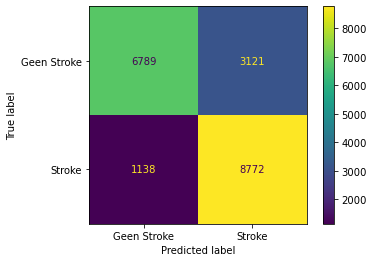

              precision    recall  f1-score   support

           0       0.86      0.69      0.76      9910
           1       0.74      0.89      0.80      9910

    accuracy                           0.79     19820
   macro avg       0.80      0.79      0.78     19820
weighted avg       0.80      0.79      0.78     19820



In [35]:
# Support Vector Classifier aanmaken
svm = SVC(random_state=42)

# Parameterraster voor de grid search
param_grid = {'C': [0.001, 0.002, 0.01, 0.15, 0.2, 1, 5, 10],'kernel': ['linear', 'rbf']}

# GridSearch aanmaken en fitten aan de trainingsdata
grid_svm = GridSearchCV(svm, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Beste parameters, estimator en f1-score verkrijgen
svm_best_params = grid_svm.best_params_
svm_best_estimator = grid_svm.best_estimator_
svm_best_f1 = grid_svm.best_score_
svm_pred = svm_best_estimator.predict(X_test)

# Resultaten printen
print("Beste parameters zijn:", svm_best_params)
print("F1-score is:", svm_best_f1)

# Confusion matrix en classification report genereren
cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()
plt.show()

# Classification report printen
print(classification_report(y_test, svm_pred))


### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

#### Gradient Boosted Decision Trees

best parameters zijn {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 300}
 f1-score is 0.9441158647139538


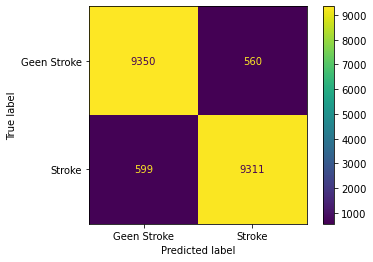

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9910
           1       0.94      0.94      0.94      9910

    accuracy                           0.94     19820
   macro avg       0.94      0.94      0.94     19820
weighted avg       0.94      0.94      0.94     19820



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

#GradientBoostClassifier aanmaken
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [2, 3, 4],'min_samples_split': [2, 5, 10]}

# gridsearch aanmaken en fitten aan de trainingsdata
grid_gb = GridSearchCV(gb, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Beste parameters,estimators en f1 score krijgen
gb_best_params = grid_gb.best_params_
gb_best_estimator = grid_gb.best_estimator_
gb_best_f1 = grid_gb.best_score_
gb_pred = gb_best_estimator.predict(X_test)

# print the results
print("best parameters zijn",gb_best_params,)
print(" f1-score is",gb_best_f1)

#confusionmatrix en classifactiion report aanmaken en printen
cm = confusion_matrix(y_test, gb_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke','Stroke'])
cmd.plot()
plt.show()
print(classification_report(y_test, gb_pred))


#### XGBoost

### Self-assembled ensemble

## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

## Conclusion & Advice

## Sources